In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns     
import pandas as pd


In [ ]:
# Load the .csv file using the pandas library. 
# Assign header=0 to set the first row of the data to be the column titles.
data = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Forest_fires_dataset.csv',header=0) # Specify the correct file path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data preprocessing

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Drop the column x, y, day. 
data.drop(columns='X', inplace=True)
data.drop(columns='Y', inplace=True)
data.drop(columns='day', inplace=True)

In [ ]:
# Replace each month with numbers 
list_month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for i in range(12):
     data.replace(to_replace=list_month[i], value=i+1, inplace=True)
data.head()
        

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Arrange different months into seasons
conditions=[
    (data['month']<=2),
    (data['month']>2)&(data['month']<=5),
    (data['month']>5)&(data['month']<=8),
    (data['month']>8)&(data['month']<=11),
    (data['month']==12)]

values=[4,1,2,3,4] # 1 - Spring, 2 - Summer, 3 - Fall, 4 - Winter
data['month']=np.select(conditions,values)
data = data.rename(columns={'month': 'season'})
data.head()


,season,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
data.drop(data[data['area']==0].index,inplace=True)
# Delete zeros in "area" 
data.head()

,season,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,3,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,3,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,2,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61


In [ ]:
attributes = data[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]
area = data[['area']]

In [ ]:
data.describe()

,season,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.429630,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,0.752105,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,2.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,2.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,3.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,4.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


In [ ]:
# Seperate all the attributes
FFMC = data.iloc[:,1].values
DMC = data.iloc[:,2].values
DC = data.iloc[:,3].values
ISI = data.iloc[:,4].values
temp = data.iloc[:,5].values
RH = data.iloc[:,6].values
wind = data.iloc[:,7].values
rain = data.iloc[:,8].values

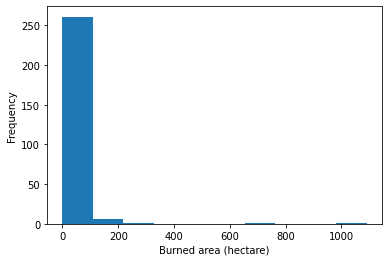

In [ ]:
# Plot the output distribution
Y = area.values
plt.figure()
plt.hist(Y)
plt.xlabel('Burned area (hectare)')
plt.ylabel('Frequency')
plt.show()

Since the histogram shown above indicates that the frequency is highly skewed to right, the dataset could be applied with logrithm and fit with Gaussian distribution. Then the log data will be used for training a model. 

In [ ]:
log_area = np.log10(Y)

In [ ]:
from scipy.stats import norm
mu, std = norm.fit(log_area)
xx = np.linspace(log_area.min(), log_area.max(), 500)
p = norm.pdf(xx, mu, std)

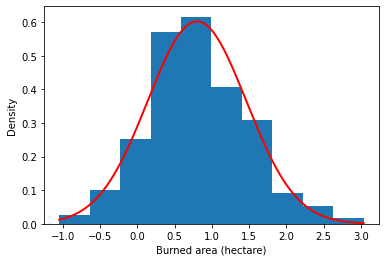

In [ ]:
plt.figure()
plt.hist(log_area, density=True)
plt.plot(xx, p, 'r', linewidth=2)
plt.xlabel('Burned area (hectare)')
plt.ylabel('Density')
plt.show()

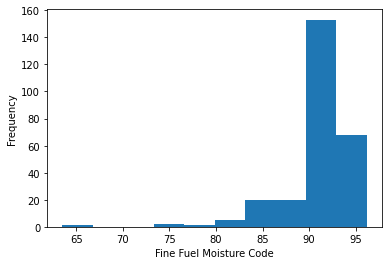

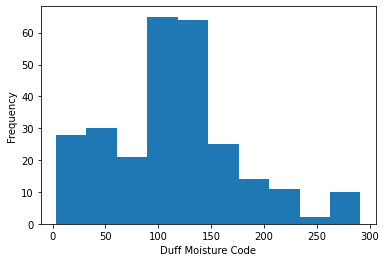

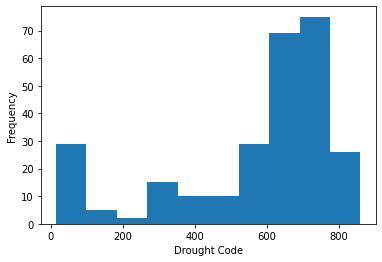

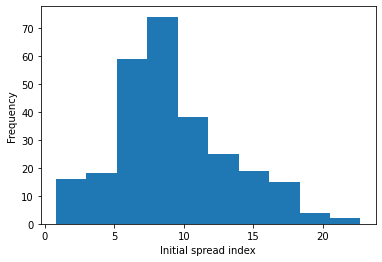

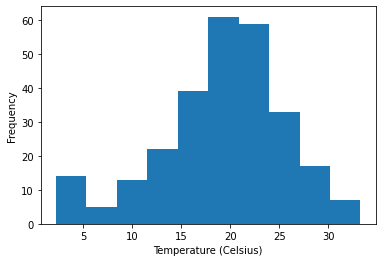

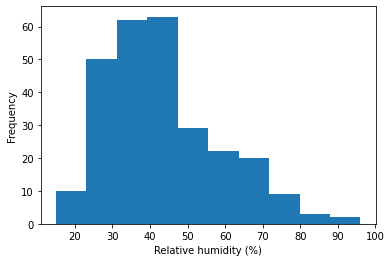

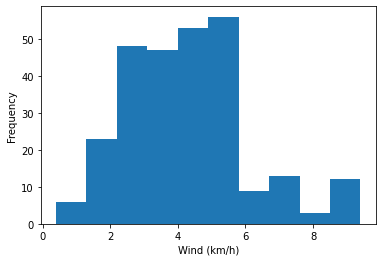

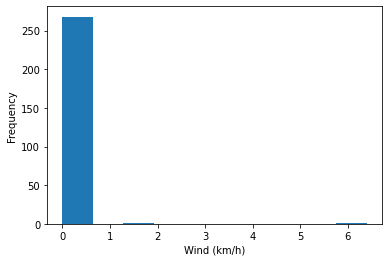

In [ ]:
# Plot the distribution of all attributes
plt.figure(1)
plt.hist(FFMC)
plt.xlabel('Fine Fuel Moisture Code')
plt.ylabel('Frequency')
plt.show()

plt.figure(2)
plt.hist(DMC)
plt.xlabel('Duff Moisture Code')
plt.ylabel('Frequency')
plt.show()

plt.figure(3)
plt.hist(DC)
plt.xlabel('Drought Code')
plt.ylabel('Frequency')
plt.show()

plt.figure(4)
plt.hist(ISI)
plt.xlabel('Initial spread index')
plt.ylabel('Frequency')
plt.show()

plt.figure(5)
plt.hist(temp)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

plt.figure(6)
plt.hist(RH)
plt.xlabel('Relative humidity (%)')
plt.ylabel('Frequency')
plt.show()

plt.figure(7)
plt.hist(wind)
plt.xlabel('Wind (km/h)')
plt.ylabel('Frequency')
plt.show()

plt.figure(8)
plt.hist(rain)
plt.xlabel('Wind (km/h)')
plt.ylabel('Frequency')
plt.show()

The data ranges varies a lot among all the inputs, therefore the dataset needs to be standarized before feeding into the training model. 

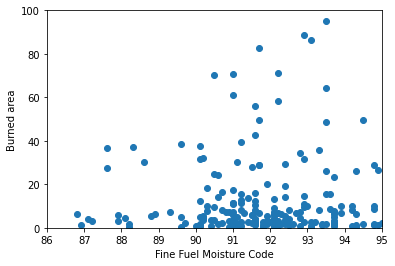

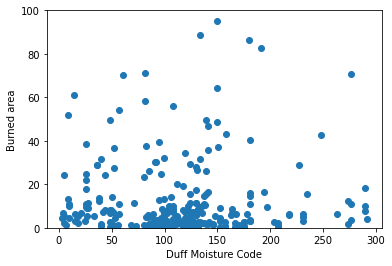

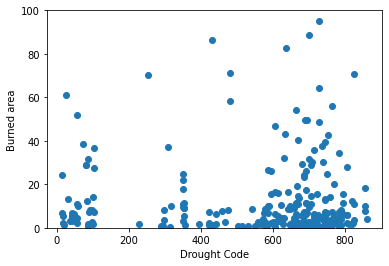

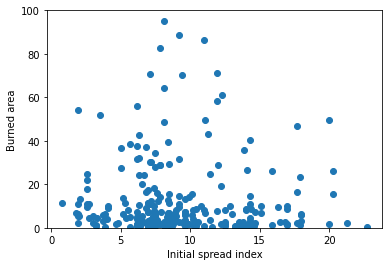

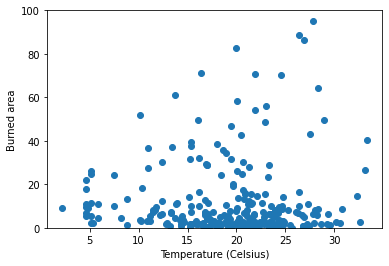

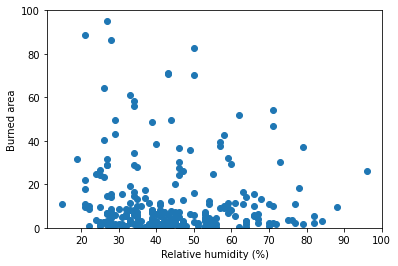

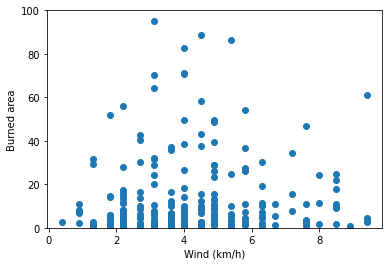

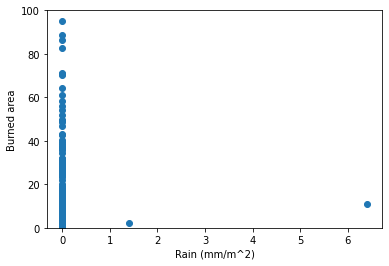

In [ ]:
# Plot all the attributes vs. output(Burned area) to check the correlation
plt.figure(1)
plt.scatter(FFMC, Y)
plt.ylim(0,100)
plt.xlim(86,95)
plt.xlabel('Fine Fuel Moisture Code')
plt.ylabel('Burned area')
plt.show()

plt.figure(2)
plt.scatter(DMC, Y)
plt.ylim(0,100)
plt.xlabel('Duff Moisture Code')
plt.ylabel('Burned area')
plt.show()

plt.figure(3)
plt.scatter(DC, Y)
plt.ylim(0,100)
plt.xlabel('Drought Code')
plt.ylabel('Burned area')
plt.show()

plt.figure(4)
plt.scatter(ISI, Y)
plt.ylim(0,100)
plt.xlabel('Initial spread index')
plt.ylabel('Burned area')
plt.show()

plt.figure(5)
plt.scatter(temp, Y)
plt.ylim(0,100)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Burned area')
plt.show()

plt.figure(6)
plt.scatter(RH, Y)
plt.ylim(0,100)
plt.xlabel('Relative humidity (%)')
plt.ylabel('Burned area')
plt.show()

plt.figure(7)
plt.scatter(wind, Y)
plt.ylim(0,100)
plt.xlabel('Wind (km/h)')
plt.ylabel('Burned area')
plt.show()

plt.figure(8)
plt.scatter(rain, Y)
plt.ylim(0,100)
plt.xlabel('Rain (mm/m^2)')
plt.ylabel('Burned area')
plt.show()

In [ ]:
# Data cleaning - Remove all the outliers in the dataset
from scipy.stats import iqr
for i in range(1,9):
  Q1 = np.quantile(data.iloc[:,i],0.25)
  Q3 = np.quantile(data.iloc[:,i],0.75)
  low_lim = Q1 - 1.5*iqr(data.iloc[:,i])
  up_lim = Q3 + 1.5*iqr(data.iloc[:,i])
  data.iloc[:,i].loc[data.iloc[:,i] < low_lim] = float("NaN")
  data.iloc[:,i].loc[data.iloc[:,i] > up_lim] = float("NaN")


In [ ]:
# Drop all the NaN values
data = data.dropna()

In [ ]:
# Get input dataset
X = data.iloc[:,0:-1].values
print(X.shape)

(190, 9)


In [ ]:
# Data cleaning - Standarize the input data
from sklearn import preprocessing
X_standardized = preprocessing.scale(X)

In [ ]:
# Get output dataset
Y = data.iloc[:,-1].values
print(Y.shape)

(190,)


<br><br>
## Regression

## Multiple Regression 

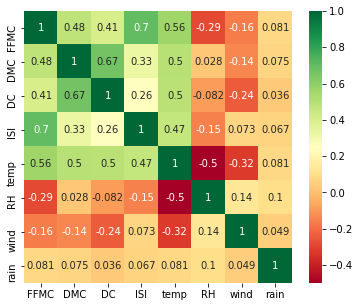

In [ ]:
#check multicoolinearity in the X dataset 
plt.figure(figsize=(6,5))  # set the size of the figure 
p=sns.heatmap(attributes.corr(), annot=True,cmap ='RdYlGn')

There is no multicolinearity issue in the matrix.  

In [ ]:
from sklearn.model_selection import train_test_split
# Test data will be 20% of the total data
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.3,shuffle=False,random_state=1)  
train_samples=len(X_train)
test_samples=len(X_test)
print('Train sample size:',format(train_samples))
print('Test sample size:',format(test_samples))


Train sample size: 133
Test sample size: 57


In [ ]:
from sklearn.linear_model import LinearRegression ## import linear regression function
mul_reg = LinearRegression(copy_X=False)    #define an instance of the LinearRegression class. 

mul_reg.fit(X_train, Y_train)#fit the X and Y datapoints to the model

slope=mul_reg.coef_  ## slope 
print(slope)
Intercept=mul_reg.intercept_
print(Intercept)

Y_pred=mul_reg.predict(X_train)     #predict the output using the fitted model


[ 0.36122795 -0.00145301  0.17015169 -0.24955171 -0.01320093 -0.15182843
 -0.13578945  0.03096325  0.        ]
0.6888524228443528


#### Model Evaluation

In [ ]:
#evaluation metrics- We will use the R2 value to evaluate the performanc e of the trained model.
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred)

0.1548770976150664

In [ ]:
Y_hat_val= mul_reg.predict(X_test) # pass the test data for the independent variable and calculate the response using the trained model

#### Model Validation  

In [ ]:
#the cost function used is the Mean Square Error
cost_train=np.mean((Y_train-Y_pred)**2)/train_samples # Training loss (i.e., MSE) calculation
print("Training loss: ",cost_train)

cost_val=np.mean((Y_test-Y_hat_val)**2)/test_samples  # Validation loss (i.e., MSE) calculation
print("Validation Loss:",cost_val)

Training loss:  0.0031223198283404823
Validation Loss: 0.010384438840958254


## Support vector regression

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
# Scale the input and train the data with Support Vector Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
SVR_model = make_pipeline(StandardScaler(), svm.SVR(kernel='linear',C=2.6,epsilon=0.1,max_iter=4000))
SVR_model.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=2.6, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=4000,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
print('The R_2 value of predicted test data set wrt to testY:',format(SVR_model.score(testX,testY)))

The R_2 value of predicted test data set wrt to testY: 0.2564626955503797


In [ ]:
# Predict with training dataset and testing dataset
train_pred = SVR_model.predict(trainX)
test_pred = SVR_model.predict(testX)

In [ ]:
# The cost function used is the Mean Square Error
cost_train = np.mean((trainY-train_pred)**2)/len(trainX)
print("Training loss: ",cost_train)
cost_val = np.mean((testY-test_pred)**2)/len(testX)
print("Validation Loss:",cost_val)

Training loss:  0.002701027859379184
Validation Loss: 0.017171349502031977





## ANN(Artificial neural network) model

In [ ]:
# Split the dataset for training the ANN model
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X_standardized, Y, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
# Define the ANN model
ANN_model = tf.keras.models.Sequential()  # create a sequential pipeline
ANN_model.add(tf.keras.layers.Flatten())  # add a Flatten layer                                                    

tf.keras.layers.Dropout(0.2, noise_shape=(1,1), seed=1)
# Output layer
ANN_model.add(tf.keras.layers.Dense(units=1, use_bias=True,
                                    kernel_initializer=tf.keras.initializers.random_normal(seed=0), 
                                    kernel_regularizer=tf.keras.regularizers.l1(0.01),
                                    activity_regularizer=tf.keras.regularizers.L2(0.01),
                                    activation = tf.nn.leaky_relu))  

# Define the optimizer and loss function
ANN_model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.02, momentum=0.1), loss = 'mean_squared_error')  

# Run the training loop to fit the data
history = ANN_model.fit(trainX, trainY, batch_size = 50, epochs = 500, validation_data=(testX,testY))

Epoch 1/500
4/4 [==============================] - 0s 35ms/step - loss: 12125.9863 - val_loss: 952.9103
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 11525.0654 - val_loss: 866.2361
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 11363.3408 - val_loss: 798.7949
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 11256.7588 - val_loss: 744.6306
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 11158.8115 - val_loss: 716.7502
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 11090.5225 - val_loss: 698.8897
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 11062.6318 - val_loss: 677.1445
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 11004.9180 - val_loss: 656.8201
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 10956.8525 - val_loss: 649.5076
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 

In [ ]:
# Make prediction with test dataset and calculate the R^2 value
from sklearn.metrics import r2_score
y_pred_test = ANN_model.predict(testX)
score = r2_score(testY, y_pred_test)
print('R^2 =',format(score))

R^2 = 0.20581732408066833


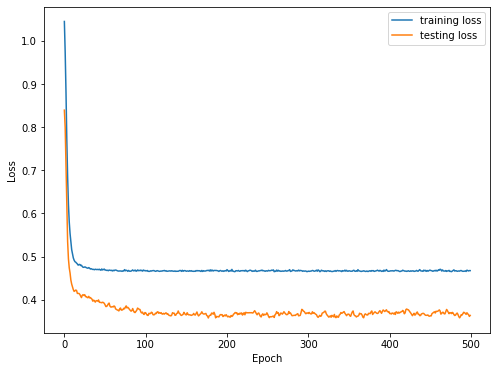

In [ ]:
# plot the training loss and testing loss vs number of epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],label='training loss') 
plt.plot(history.history['val_loss'],label='testing loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<br><br>
## Classification

## KNN(K nearest neighbors)

In [ ]:
# Get input dataset
#X = data[['season','FFMC','DMC','DC','ISI','temp','RH','wind','rain']]
X = data[['season','FFMC','DMC','DC']]
print(X)


     season  FFMC    DMC     DC
139       3  91.0  129.5  692.6
140       3  90.9  126.5  686.5
141       2  95.5   99.9  513.3
143       2  90.0   51.3  296.3
144       2  95.5   99.9  513.3
..      ...   ...    ...    ...
496       2  96.2  175.5  661.8
497       2  96.1  181.1  671.2
498       2  96.1  181.1  671.2
505       2  91.0  163.2  744.4
510       2  91.0  166.9  752.6

[190 rows x 4 columns]


In [ ]:
#Standarlize the Data for KNN, SVM, Decision Tree, and Logistic Regression
X_standardized = (X-X.mean())/(X.std())

In [ ]:
# Get output dataset with logarithm processing
data.area = np.log10(data.area).values

In [ ]:
# Converting the Area into a binary variable (Small Fires #0 & Large Fires #1)

data.loc[data.area <= np.log10(3.2), "area"] = 0
data.loc[data.area > np.log10(3.2), "area"] = 1

print(data.area)

139    0.0
140    0.0
141    0.0
143    0.0
144    0.0
      ... 
496    0.0
497    1.0
498    1.0
505    1.0
510    0.0
Name: area, Length: 190, dtype: float64


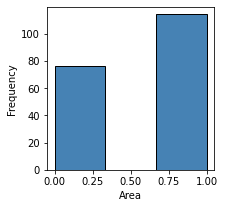

In [ ]:
# Histogram for Output Bias Test
Y_binary = data.area.values
fig = plt.figure(figsize = (3,3))
plt.xlabel("Area")
plt.ylabel("Frequency") 
freq, bins, patches = plt.hist(Y_binary, color='steelblue', bins=3,
                                    edgecolor='black', linewidth=1)

In [ ]:
#Data splitting
from sklearn.model_selection import train_test_split  #importing the train_test_split function from the sklearn library

trainX, testX, trainy, testy = train_test_split(X_standardized, Y_binary, test_size=0.2, shuffle=True, random_state=1)   # split the dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


According to the plot, we can see that best performance of the KNN classifier is at k=6. Both training score and test score are close to each other and also maximum for the test score. Hence we set up our knn classifier with k=3
The accuracy of the model on training data for k=14, Uniform Weight Function: 0.6578947368421053
The accuracy of the model on test data for k=14, Uniform Weight Function: 0.7368421052631579


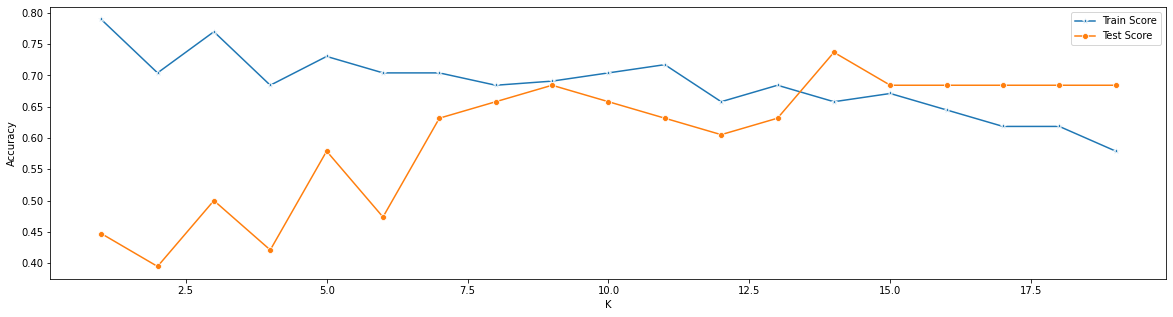

In [ ]:
#import KNeighboursClassifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#create an empty list to store the accuracy for each k value. This will be later used for comparison
train_scores_KNN = []
test_scores_KNN = []

#run this for loop to find the best k value
for i in range(1,20):
    #for the current loop assign k=i
    knn = KNeighborsClassifier(i)
    #the training data
    knn.fit(trainX,trainy)
    #predict the class label for the training data
    pred_Y_train=knn.predict(trainX)
    #get the training accuracy
    train_accuracy=accuracy_score(pred_Y_train,trainy)
    #append the training accuracy at a particular k value to the list.
    train_scores_KNN.append(train_accuracy)

    #predict the class label for test data
    pred_Y_test=knn.predict(testX)
    #get the test accuracy
    test_accuracy=accuracy_score(pred_Y_test,testy)
    #append the test accuracy at a particular k value to the list.
    test_scores_KNN.append(test_accuracy)

plt.figure(figsize=(20,5))
p = sns.lineplot(range(1,20),train_scores_KNN,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores_KNN,marker='o',label='Test Score')
plt.xlabel("K")
plt.ylabel("Accuracy")

print("According to the plot, we can see that best performance of the KNN classifier is at k=6. Both training score and test score are close to each other and also maximum for the test score. Hence we set up our knn classifier with k=3")

#Setup a knn classifier with k neighbors
knn_Uniform = KNeighborsClassifier(14)
knn_Uniform.fit(trainX,trainy)

pred_Y_train=knn_Uniform.predict(trainX)
train_accuracy=accuracy_score(pred_Y_train,trainy)
pred_Y_test=knn_Uniform.predict(testX)
test_accuracy=accuracy_score(pred_Y_test,testy)

print("The accuracy of the model on training data for k=14, Uniform Weight Function:",train_accuracy)
print("The accuracy of the model on test data for k=14, Uniform Weight Function:",test_accuracy,)


              precision    recall  f1-score   support

         0.0       0.69      0.60      0.64        15
         1.0       0.76      0.83      0.79        23

    accuracy                           0.74        38
   macro avg       0.73      0.71      0.72        38
weighted avg       0.73      0.74      0.73        38



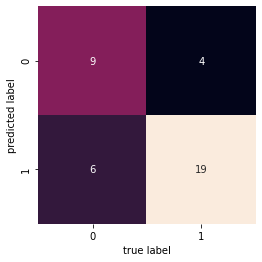

In [ ]:
#build a confusion matrix for training data to visualize the performance of the model using Distance Weight Function
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testY_KNN, pred_Y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

#import classification_report for training data - (Precision, Recall, F1-score and support)
from sklearn.metrics import classification_report
print(classification_report(testY_KNN,pred_Y_test))


### Logistic Regression

In [ ]:
#Logistic regression model

#import the necessary functions
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#define an instance of the LogisticRegression class
model_log = LogisticRegression(penalty="l2",C=1.0,fit_intercept=True,max_iter=100)

# fit the model on the training set
model_log.fit(trainX, trainy) # fit function determines the coefficients using the maximum likelihood estimate (MLE) method.

# predict the test set
yhat = model_log.predict(testX) # Prediction using the test data

In [ ]:
#print out the model parameters beta_i
print(model_log.intercept_)
print(model_log.coef_)

[0.42171001]
[[ 0.70440611  0.06302333  0.25971736 -0.44447234]]


In [ ]:
# evaluate model accuracy. 
score = accuracy_score(testy, yhat)
print(score)

0.6052631578947368


              precision    recall  f1-score   support

         0.0       0.50      0.27      0.35        15
         1.0       0.63      0.83      0.72        23

    accuracy                           0.61        38
   macro avg       0.57      0.55      0.53        38
weighted avg       0.58      0.61      0.57        38



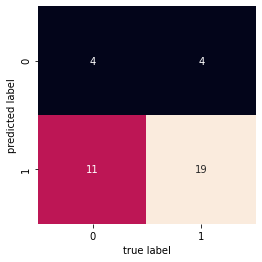

In [ ]:
#build a confusion matrix to better understand the result. Visualize the confusion matrix as a heat map using the Seaborn library.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testy, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

#import classification_report- (Precision, Recall, F1-score and support)
from sklearn.metrics import classification_report
print(classification_report(testy, yhat))

### Support Vector Machine - Linear Kernel



0.6052631578947368
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.61      1.00      0.75        23

    accuracy                           0.61        38
   macro avg       0.30      0.50      0.38        38
weighted avg       0.37      0.61      0.46        38



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


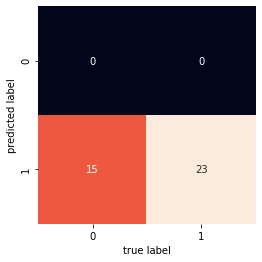

In [ ]:
#Support vector machines - Linear Kernel
#import svm function from the sklearn library
from sklearn import svm
model_linear = svm.SVC(kernel='linear',C=1,max_iter=1000) #define an instance of SVC class
model_linear.fit(trainX,trainy)

# predict the test set
yhat = model_linear.predict(testX) # Prediction using the test data

# evaluate model accuracy. 
score = accuracy_score(testy, yhat)
print(score)

#build a confusion matrix to better understand the result. Visualize the confusion matrix as a heat map using the Seaborn library.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testy, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

#import classification_report- (Precision, Recall, F1-score and support)
from sklearn.metrics import classification_report
print(classification_report(testy, yhat))


### Support Vector Machine - Polynomial Kernel


0.6052631578947368
              precision    recall  f1-score   support

         0.0       0.50      0.13      0.21        15
         1.0       0.62      0.91      0.74        23

    accuracy                           0.61        38
   macro avg       0.56      0.52      0.47        38
weighted avg       0.57      0.61      0.53        38



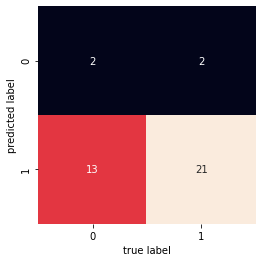

In [ ]:
#Support vector machines - Polynomial Kernel
from sklearn import svm
model_poly = svm.SVC(kernel='poly',degree=2,C=1,max_iter=1000) #define an instance of SVC class
model_poly.fit(trainX,trainy)

# predict the test set
yhat = model_poly.predict(testX) # Prediction using the test data

# evaluate model accuracy. 
score = accuracy_score(testy, yhat)
print(score)

#build a confusion matrix to better understand the result. Visualize the confusion matrix as a heat map using the Seaborn library.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testy, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

#import classification_report- (Precision, Recall, F1-score and support)
from sklearn.metrics import classification_report
print(classification_report(testy, yhat))


### Support Vector Machine - RBF Kernel


0.631578947368421
              precision    recall  f1-score   support

         0.0       0.60      0.20      0.30        15
         1.0       0.64      0.91      0.75        23

    accuracy                           0.63        38
   macro avg       0.62      0.56      0.53        38
weighted avg       0.62      0.63      0.57        38



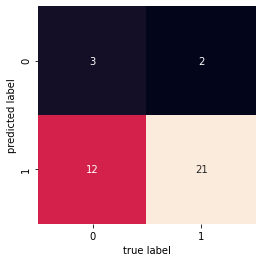

In [ ]:
#Support vector machines-RBF Kernel
from sklearn import svm
model_rbf = svm.SVC(kernel='rbf',degree=2,C=1,max_iter=1000) #define an instance of SVC class
model_rbf.fit(trainX,trainy)

# predict the test set
yhat = model_rbf.predict(testX) # Prediction using the test data

# evaluate model accuracy. 
score = accuracy_score(testy, yhat)
print(score)

#build a confusion matrix to better understand the result. Visualize the confusion matrix as a heat map using the Seaborn library.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testy, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

#import classification_report- (Precision, Recall, F1-score and support)
from sklearn.metrics import classification_report
print(classification_report(testy, yhat))


### Decision Tree

0.5
              precision    recall  f1-score   support

         0.0       0.39      0.47      0.42        15
         1.0       0.60      0.52      0.56        23

    accuracy                           0.50        38
   macro avg       0.49      0.49      0.49        38
weighted avg       0.52      0.50      0.51        38



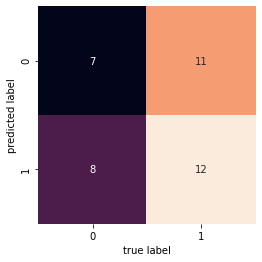

In [ ]:
#Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainX,trainy)

# predict the test set
yhat = clf.predict(testX)

# evaluate model accuracy. 
score = accuracy_score(testy, yhat)
print(score)

#build a confusion matrix to better understand the result. Visualize the confusion matrix as a heat map using the Seaborn library.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testy, yhat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

#import classification_report- (Precision, Recall, F1-score and support)
from sklearn.metrics import classification_report
print(classification_report(testy, yhat))
